In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import unicodedata
from IPython.display import display
from mpl_toolkits.basemap import Basemap
%matplotlib inline

import sys
from PIL import Image


master_dir = '/home/sam/Documents/architecture/'
photo_dir = master_dir + 'data/processed/photos/'
arch_full = pd.read_csv(master_dir + 'data/processed/architecture.csv')
arch_light = pd.read_csv(master_dir + 'data/processed/architecture_text_only.csv')

In [4]:
top_style = list(arch_full.building_main_style.value_counts()[:18].index)
top_arch_full = arch_full[arch_full.building_main_style.isin(top_style)]

size = 16        # sample size
replace = False  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]

random_16 = top_arch_full.groupby('building_main_style', as_index=False).apply(fn)

style = [random_16.building_main_style[x].values for x in range(18)] #name of building style
photo_links = [photo_dir + x for x in [random_16.jpg_name[x].values for x in range(18)]]

def image_show(photo_links, style):
    images = map(Image.open, photo_links)
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
      new_im.paste(im, (x_offset,0))
      x_offset += im.size[0]

    new_im.save('/home/sam/Documents/' +str(style)+ '_example.jpg')

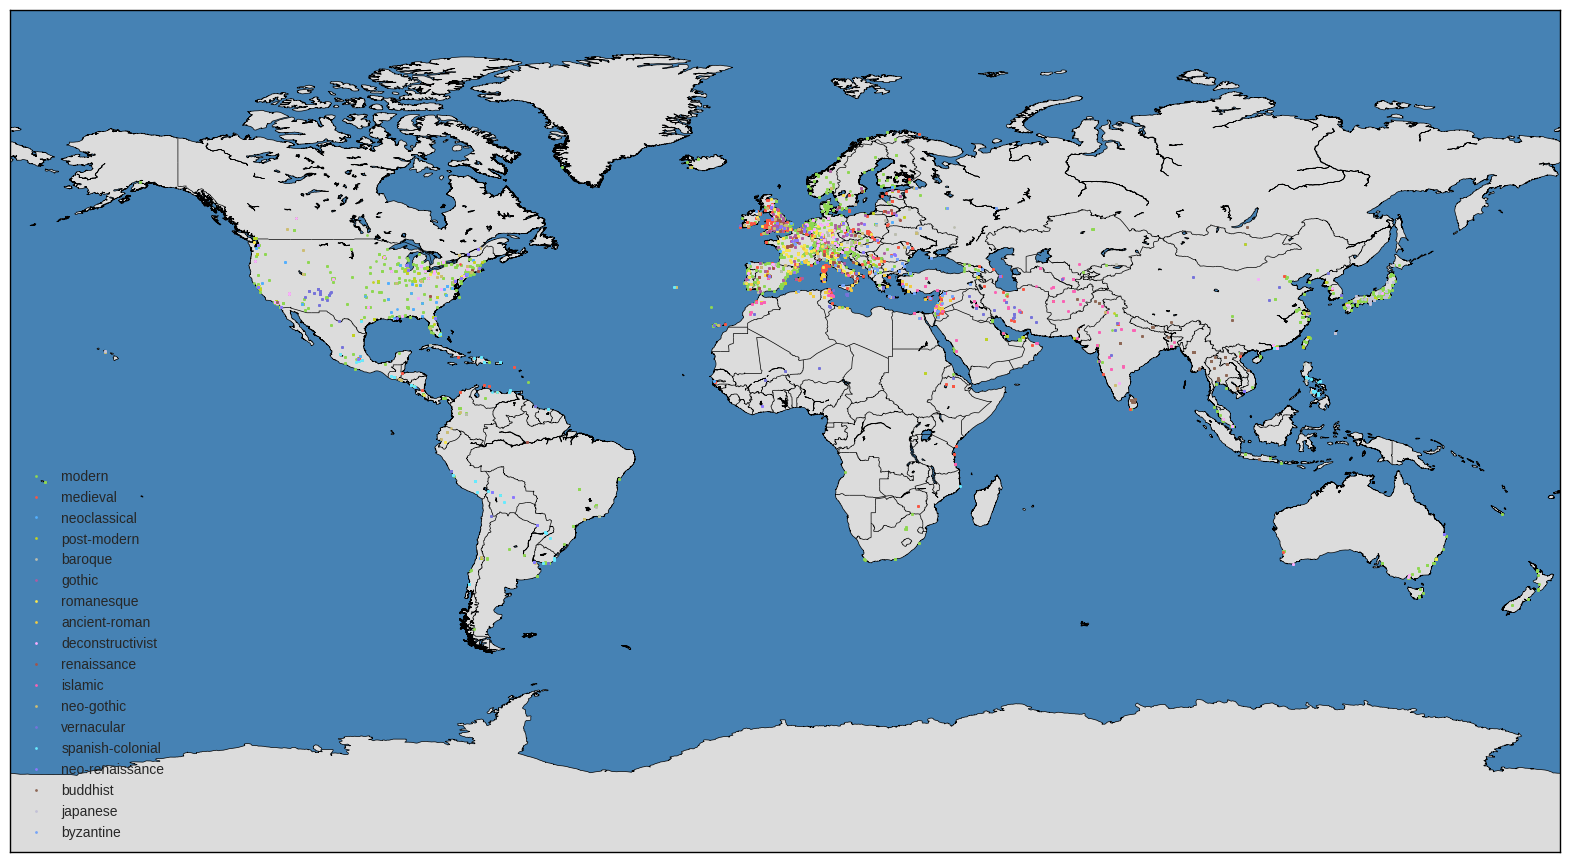

In [11]:
cols = ["#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"]

top_style = list(arch_light.building_main_style.value_counts()[:18].index)
top_arch_light = arch_light[arch_light.building_main_style.isin(top_style)]

plt.figure(figsize=(20, 15))

themap = Basemap(projection='gall',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='i', area_thresh= 1000)

themap.drawcoastlines(linewidth = 0.5)
themap.drawcountries()
themap.fillcontinents(color = 'gainsboro', lake_color='steelblue')
themap.drawmapboundary(fill_color='steelblue')

for a in range(len(top_style)) :

    lat = top_archi.building_latitude[top_archi.building_main_style == top_style[a]].values
    lon = top_archi.building_longitude[top_archi.building_main_style == top_style[a]].values

    x, y = themap(lon, lat)
    themap.plot(x, y, 
                'o',                    # marker shape
                c=cols[a],  # marker colour
                markersize=2,           # marker size
                label = top_style[a])
    

plt.legend(loc='lower left')    
plt.savefig('/home/sam/Documents/world_map.png', dpi= 400)
plt.show()

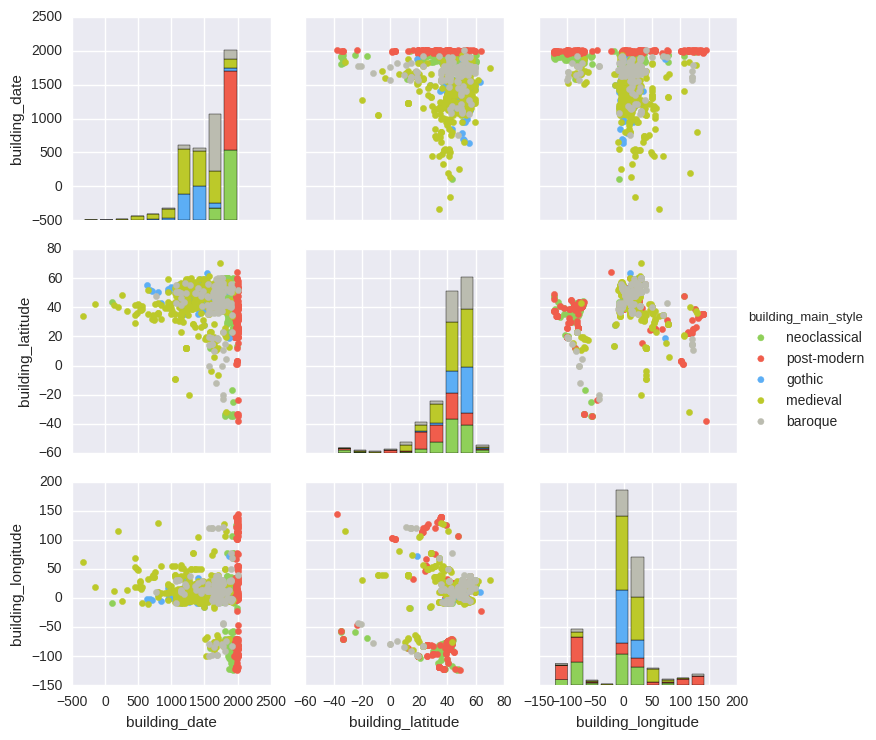

In [12]:
top_style = list(arch_light.building_main_style.value_counts()[1:6].index)
top_arch_light = arch_light[arch_light.building_main_style.isin(top_style)]

df_cols = top_arch_light[['building_main_style','building_date','building_latitude', 'building_longitude', 'building_main_type']]

with sns.color_palette(["#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"], n_colors=18, desat=.9):
    g=sns.PairGrid(df_cols,hue='building_main_style')
    g = g.map_offdiag(plt.scatter)
    g = g.map_diag(plt.hist)
    g.add_legend()
    plt.savefig('/home/sam/Documents/top5_datagrid_nomodern.png')